In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn import metrics

In [48]:
data = pd.read_csv('Datas/DataTreinamentoDevAcademy/data_2__.csv', date_parser = 'data')
#data_test = pd.read_csv('Datas/DataTreinamentoDevAcademy/data_1__test.csv', date_parser = 'data')
data.head()

,index,data,valor
0,0,2014-07-18,1.50
1,1,2014-08-05,83.20
2,2,2014-08-08,22.50
3,3,2014-08-11,15.91
4,4,2014-08-12,0.44


In [5]:
data.tail()

,index,data,valor
1537,1537,2018-10-27,19315.50
1538,1538,2018-10-28,12903.71
1539,1539,2018-10-29,11071.90
1540,1540,2018-10-30,11205.80
1541,1541,2018-10-31,12025.80


In [52]:
data['data'] = data['data'].astype('datetime64[ns]')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   1542 non-null   int64         
 1   data    1542 non-null   datetime64[ns]
 2   valor   1542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 36.3 KB


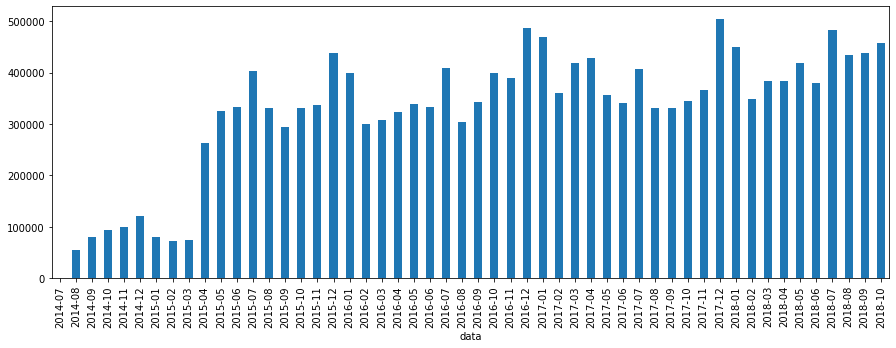

In [10]:
data['valor'].groupby(data['data'].dt.to_period('M')).sum().plot(kind='bar', figsize=(15,5))

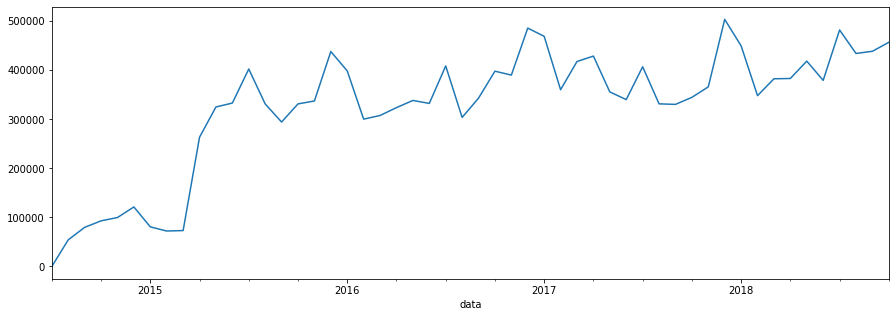

In [17]:
data['valor'].groupby(data['data'].dt.to_period('M')).sum().plot(figsize=(15,5))

### Filtering by values with minus discrepancy

In [60]:
from datetime import date
data = data[data['data'] > pd.Timestamp(date(2015,3,31))]

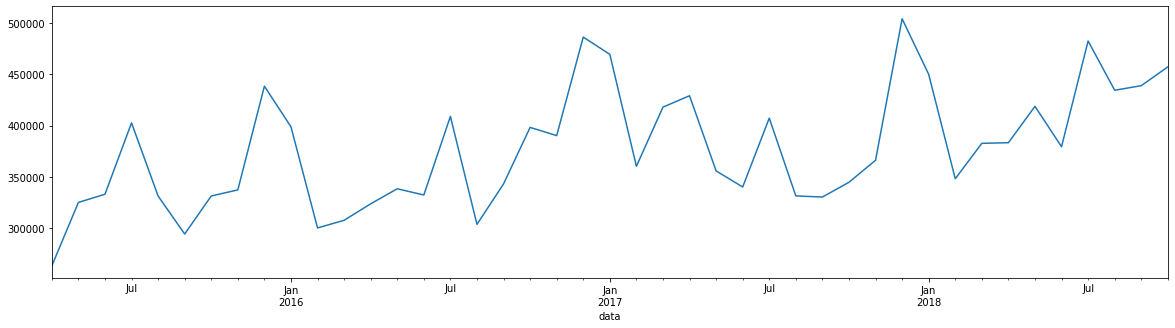

In [63]:
data['valor'].groupby(data['data'].dt.to_period('M')).sum().plot(figsize=(20,5))

In [64]:
len(data)

1308

### Separate training and test

In [81]:
data_training = data.iloc[:1008, :]
data_test = data.iloc[1008:1308, :]

In [85]:
data_training = data[['valor']].values
#data_train = data.iloc[:, 2:3].values

In [88]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
data_train_scaled = scaler.fit_transform(np.array(data_training))

In [90]:
previsores = []
preco_real = []
for i in range(70, len(data)):
    previsores.append(data_train_scaled[i-70:i, 0])
    preco_real.append(data_train_scaled[i, 0])

In [91]:
previsores, preco_real = np.array(previsores), np.array(preco_real)

In [92]:
dt_values = pd.DataFrame(previsores)
dt_values[70] = pd.DataFrame(preco_real)
dt_values.head()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,0.042554,0.096993,0.148938,0.686570,0.476101,0.268323,0.254226,0.264016,0.263845,0.346221,...,0.210864,0.265175,0.354598,0.683880,0.454282,0.521631,0.534883,0.183631,0.286545,0.268387
1,0.096993,0.148938,0.686570,0.476101,0.268323,0.254226,0.264016,0.263845,0.346221,0.589560,...,0.265175,0.354598,0.683880,0.454282,0.521631,0.534883,0.183631,0.286545,0.268387,0.359400
2,0.148938,0.686570,0.476101,0.268323,0.254226,0.264016,0.263845,0.346221,0.589560,0.521205,...,0.354598,0.683880,0.454282,0.521631,0.534883,0.183631,0.286545,0.268387,0.359400,0.600715
3,0.686570,0.476101,0.268323,0.254226,0.264016,0.263845,0.346221,0.589560,0.521205,0.208467,...,0.683880,0.454282,0.521631,0.534883,0.183631,0.286545,0.268387,0.359400,0.600715,0.681066
4,0.476101,0.268323,0.254226,0.264016,0.263845,0.346221,0.589560,0.521205,0.208467,0.164936,...,0.454282,0.521631,0.534883,0.183631,0.286545,0.268387,0.359400,0.600715,0.681066,0.655659


In [93]:
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))
previsores.shape

(1238, 70, 1)